In [96]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [97]:
import torch
import random
import torch.backends.cudnn as cudnn

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(0)

In [98]:
 # Data load

df = pd.read_csv('경기도_clustered1.csv',encoding = 'cp949')

cluster = pd.read_csv('경기도_clustered1.csv',encoding = 'cp949',index_col = 0)
cluster

,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,고양시,...,이천시,안성시,김포시,화성시,광주시,양주시,여주시,포천시,의왕시,오산시
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,63.40000,67.80000,77.70000,60.50000,68.10000,53.00000,92.60000,92.60000,66.80000,69.50000,...,89.20000,92.60000,71.10000,73.00000,82.40000,82.00000,102.80000,93.60000,59.70000,83.20000
2013-02-01,63.30000,67.20000,77.40000,60.20000,67.70000,52.90000,92.50000,90.90000,66.60000,69.00000,...,89.40000,92.80000,70.90000,72.90000,82.00000,81.70000,102.80000,93.60000,59.10000,83.00000
2013-03-01,63.20000,66.90000,76.90000,60.00000,67.40000,52.60000,92.40000,90.10000,66.30000,68.60000,...,89.70000,92.80000,70.80000,72.80000,81.90000,81.40000,102.70000,93.60000,58.70000,82.90000
2013-04-01,63.30000,67.10000,76.40000,59.80000,67.40000,52.60000,92.40000,90.00000,66.30000,68.10000,...,90.10000,93.50000,70.70000,73.20000,82.30000,81.70000,102.70000,93.90000,58.60000,82.90000
2013-05-01,63.40000,67.50000,76.40000,59.60000,67.60000,52.90000,92.40000,89.80000,66.60000,68.10000,...,90.40000,93.80000,71.00000,73.60000,82.30000,81.90000,103.60000,94.70000,58.80000,82.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,109.50000,104.80000,107.20000,111.70000,110.20000,107.30000,113.20000,107.70000,110.70000,107.60000,...,110.30000,114.80000,105.30000,111.60000,107.90000,109.50000,106.60000,108.40000,112.90000,115.90000
2021-12-01,109.80000,105.10000,107.40000,112.00000,110.80000,107.40000,114.10000,107.50000,111.20000,108.00000,...,112.30000,116.10000,105.60000,111.60000,108.40000,109.80000,107.20000,109.00000,113.00000,116.70000
2022-01-01,109.80000,105.10000,107.40000,111.80000,110.80000,107.30000,114.30000,107.50000,111.30000,108.10000,...,113.30000,116.90000,105.60000,111.50000,108.70000,109.80000,107.10000,109.20000,113.00000,116.80000


In [99]:
# Training/Test ratio = 7:3

Train_ratio = 0.7

Test_ratio = 0.3

In [100]:
result =  pd.DataFrame(data=[0,0,0,0],
                             index = ['MAE','RMSE','MAPE', 'R2'],
                             columns=['test'])
predict =  pd.DataFrame(data=[],columns=['test'] )
predict

,test


In [101]:
df.set_index('date', inplace=True)


In [102]:
df = df.iloc[:-1,:]
df

,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,고양시,...,이천시,안성시,김포시,화성시,광주시,양주시,여주시,포천시,의왕시,오산시
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,63.40000,67.80000,77.70000,60.50000,68.10000,53.00000,92.60000,92.60000,66.80000,69.50000,...,89.20000,92.60000,71.10000,73.00000,82.40000,82.00000,102.80000,93.60000,59.70000,83.20000
2013-02-01,63.30000,67.20000,77.40000,60.20000,67.70000,52.90000,92.50000,90.90000,66.60000,69.00000,...,89.40000,92.80000,70.90000,72.90000,82.00000,81.70000,102.80000,93.60000,59.10000,83.00000
2013-03-01,63.20000,66.90000,76.90000,60.00000,67.40000,52.60000,92.40000,90.10000,66.30000,68.60000,...,89.70000,92.80000,70.80000,72.80000,81.90000,81.40000,102.70000,93.60000,58.70000,82.90000
2013-04-01,63.30000,67.10000,76.40000,59.80000,67.40000,52.60000,92.40000,90.00000,66.30000,68.10000,...,90.10000,93.50000,70.70000,73.20000,82.30000,81.70000,102.70000,93.90000,58.60000,82.90000
2013-05-01,63.40000,67.50000,76.40000,59.60000,67.60000,52.90000,92.40000,89.80000,66.60000,68.10000,...,90.40000,93.80000,71.00000,73.60000,82.30000,81.90000,103.60000,94.70000,58.80000,82.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,108.40000,104.30000,106.50000,110.50000,108.70000,106.70000,111.70000,107.30000,109.30000,106.70000,...,107.80000,112.60000,104.70000,110.90000,106.80000,108.50000,105.20000,107.30000,111.50000,114.10000
2021-11-01,109.50000,104.80000,107.20000,111.70000,110.20000,107.30000,113.20000,107.70000,110.70000,107.60000,...,110.30000,114.80000,105.30000,111.60000,107.90000,109.50000,106.60000,108.40000,112.90000,115.90000
2021-12-01,109.80000,105.10000,107.40000,112.00000,110.80000,107.40000,114.10000,107.50000,111.20000,108.00000,...,112.30000,116.10000,105.60000,111.60000,108.40000,109.80000,107.20000,109.00000,113.00000,116.70000


In [109]:
from tqdm.notebook import tqdm
for i in tqdm(range(1)):
        
    
    x = df.iloc[:,i:i+1]
    y = df.iloc[:,i:i+1]
    
       
    train_x = x.iloc[0:int(len(x)*Train_ratio),:]

    

    test_y = y.iloc[int(len(x)*Train_ratio):,:]
    

    
    

    # Normalizing , 둘다 학습하여 성능비교할것

    minmax = MinMaxScaler()

    standard = StandardScaler()

    
    
    train_x = minmax.fit_transform(train_x)


    test_y = minmax.fit_transform(test_y)





    # Numpy array상태로는 학습이 불가능하므로, Torch Variable 형태로 변경(data/grad/grad_fn)

    train_x_tensor = Variable(torch.Tensor(train_x))

    

    test_y_tensor = Variable(torch.Tensor(test_y))

    

    train_x_tensor_final = torch.reshape(train_x_tensor, (train_x_tensor.shape[0], 1, train_x_tensor.shape[1]))

    

    test_y_tensor_final = torch.reshape(test_y_tensor,(test_y_tensor.shape[0], 1, test_y_tensor.shape[1]) )

    


    ## LSTM network modeling

    class LSTM_Jun(nn.Module):

        def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length) : 

            super(LSTM_Jun, self).__init__()

            self.num_classes = num_classes

            self.num_layers = num_layers

            self.input_size = input_size

            self.hidden_size = hidden_size

            self.seq_length = seq_length

            self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first = True)

            self.layer_1 = nn.Linear(hidden_size, 256)

            self.layer_2 = nn.Linear(256,256)

            self.layer_3 = nn.Linear(256,128)

            self.layer_out = nn.Linear(128, num_classes)

            self.relu = nn.ReLU() #Activation Func

        def forward(self,x):

            h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #Hidden State

            c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #Internal Process States



            output, (hn, cn) = self.lstm(x, (h_0, c_0))



            hn = hn.view(-1, self.hidden_size) # Reshaping the data for starting LSTM network

            out = self.relu(hn) #pre-processing for first layer

            out = self.layer_1(out) # first layer

            out = self.relu(out) # activation func relu

            out = self.layer_2(out)

            out = self.relu(out)

            out = self.layer_3(out)

            out = self.relu(out)

            out = self.layer_out(out) #Output layer

            return out

 

    # Code Main

    num_epochs = 500
    learning_rate = 0.005

    input_size = int(len(x.columns))

    hidden_size = 2 # number of features in hidden state

    num_layers = 1

    num_classes = int(len(y.columns))



    model = LSTM_Jun(num_classes, input_size, hidden_size, num_layers, train_x_tensor_final.shape[1]).to(device)



    

    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

 

    for epoch in tqdm(range(num_epochs)) : 

        outputs = model.forward(train_x_tensor_final.to(device))

        optimizer.zero_grad()

        loss = loss_function(outputs, train_y_tensor.to(device))

        loss.backward()

        optimizer.step() # improve from loss = back propagation

        if epoch % 100 == 0 :

            print("Epoch : %d, loss : %1.5f" % (epoch, loss.item()))
            

    # Estimated Value

    test_predict = model(test_x_tensor_final.to(device)) #Forward Pass

    predict_data = test_predict.data.detach().cpu().numpy() #numpy conversion

    predict_data = minmax.inverse_transform(predict_data) #inverse normalization(Min/Max)
    
    y_pred = predict_data[:,0]

    # Real Value

    real_data = test_y_tensor.data.numpy() # Real value

    real_data = minmax.inverse_transform(real_data) #inverse normalization 
    
    y_test = real_data[:,0]

    
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
    MAPE= np.mean(np.abs((y_test - y_pred) / y_test))
    pd.options.display.float_format = '{:.5f}'.format
    
    label = df.columns[i]
    Result = pd.DataFrame(data=[MAE,RMSE, MAPE,R2],
                         index = ['MAE','RMSE','MAPE','R2'],
                         columns=[label])
        
    

    result = pd.concat([result,Result],axis = 1)

    

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

Epoch : 0, loss : 0.00000
Epoch : 100, loss : 0.00000
Epoch : 200, loss : 0.00000
Epoch : 300, loss : 0.00000
Epoch : 400, loss : 0.00000
Epoch : 500, loss : 0.00000
Epoch : 600, loss : 0.00000
Epoch : 700, loss : 0.00000
Epoch : 800, loss : 0.00000
Epoch : 900, loss : 0.00000
Epoch : 1000, loss : 0.00000
Epoch : 1100, loss : 0.00000
Epoch : 1200, loss : 0.00000
Epoch : 1300, loss : 0.00000
Epoch : 1400, loss : 0.00000
Epoch : 1500, loss : 0.00000
Epoch : 1600, loss : 0.00000
Epoch : 1700, loss : 0.00000
Epoch : 1800, loss : 0.00000
Epoch : 1900, loss : 0.00000
Epoch : 2000, loss : 0.00000
Epoch : 2100, loss : 0.00000
Epoch : 2200, loss : 0.00000
Epoch : 2300, loss : 0.00000
Epoch : 2400, loss : 0.00000
Epoch : 2500, loss : 0.00000
Epoch : 2600, loss : 0.00000
Epoch : 2700, loss : 0.00000
Epoch : 2800, loss : 0.00000
Epoch : 2900, loss : 0.00000
Epoch : 3000, loss : 0.00000
Epoch : 3100, loss : 0.00000
Epoch : 3200, loss : 0.00000
Epoch : 3300, loss : 0.00000
Epoch : 3400, loss : 0.000

In [110]:
del result['test']
result
result.to_csv('평가지표_가격지수만.csv',encoding='cp949')
result

KeyError: 'test'

In [105]:
del predict['test']

predict.to_csv('예측치_가격지수만.csv',encoding='cp949')
predict

""


In [106]:
y_pred 

array([71.71624 , 71.71632 , 71.7164  , 71.716484, 71.71665 , 71.716896,
       71.71764 , 71.71891 , 71.72039 , 71.72264 , 71.72301 , 71.72316 ,
       71.72357 , 71.72395 , 71.724174, 71.724365, 71.72452 , 71.72467 ,
       71.7249  , 71.725136, 71.724915, 71.72475 , 71.72453 , 71.72436 ,
       71.72639 , 71.7285  , 71.73032 , 71.73172 , 71.733215, 71.733955,
       71.734146, 71.734146], dtype=float32)

In [107]:
y_test

array([ 73.3     ,  73.4     ,  73.5     ,  73.6     ,  73.8     ,
        74.100006,  75.      ,  76.50001 ,  80.200005,  84.7     ,
        85.7     ,  86.1     ,  87.200005,  88.2     ,  88.799995,
        89.3     ,  89.700005,  90.100006,  90.7     ,  91.7     ,
        93.4     ,  94.7     ,  96.3     ,  97.299995, 100.      ,
       102.4     , 104.7     , 106.5     , 108.399994, 109.5     ,
       109.8     , 109.8     , 109.6     ], dtype=float32)

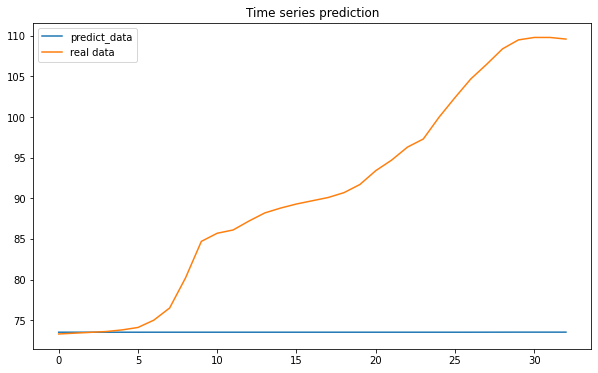

In [111]:
#Figure

plt.figure(figsize = (10,6)) # Plotting
plt.plot(y_pred, label = 'predict_data')
plt.plot(y_test, label = 'real data')

plt.title('Time series prediction')
plt.legend()
plt.show()